<center><font size="16">**Titanic: Machine Learning from Disaster**</font></center>

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this notebook, we will see how to dig deep into the data and visualize it.

 [![TITANIC sinking](https://i.imgur.com/8Rmg0vy.jpg)](https://youtu.be/9xoqXVjBEF8 "TITANIC sinking")

### Data Dictionary

<center>
<table class="table table-bordered">
<tr>
<th style="width:5%">Variable</th><th style="width:5%">Definition</th><th style="width:5%">Key</th>
</tr>
<tr>
<td>survival</td>
<td>Survival</td>
<td>0 = No, 1 = Yes</td>
</tr>
<tr>
<td>pclass</td>
<td>Ticket class</td>
<td>1 = 1st, 2 = 2nd, 3 = 3rd</td>
</tr>
<tr>
<td>sex</td>
<td>sex</td>
<td></td>
</tr>
<tr>
<td>Age</td>
<td>Age in years</td>
<td></td>
</tr>
<tr>
<td>sibsp</td>
<td># of siblings / spouses aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>parch</td>
<td># of parents / children aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>ticket</td>
<td>Ticket number</td>
<td></td>
</tr>
<tr>
<td>fare</td>
<td>Passenger fare</td>
<td></td>
</tr>
<tr>
<td>cabin</td>
<td>Cabin number</td>
<td></td>
</tr>
<tr>
<td>embarked</td>
<td>Port of Embarkation</td>
<td>C = Cherbourg, Q = Queenstown, S = Southampton</td>
</tr>
</table>
</center>

# Wrangling & EDA

## 1. Loading Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

## 2. Loading Data & Basic Analysis

In [2]:
data = pd.read_csv('titanic_data.csv')

In [3]:
df=data.copy()

### Basic Structure

We can use the method **head()** to examine the first five rows of a dataframe: 

In [4]:
df.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


We can use the method **tail()** to examine the last five rows of a dataframe: 

In [5]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


We can use the attribute **shape** to examine the number of rows and columns of a dataframe: 

In [6]:
df.shape

(891, 12)

We can access the column "Name" and assign it a new dataframe 'new_name':

In [7]:
df['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
5                                       Moran, Mr. James
6                                McCarthy, Mr. Timothy J
7                         Palsson, Master. Gosta Leonard
8      Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                    Nasser, Mrs. Nicholas (Adele Achem)
10                       Sandstrom, Miss. Marguerite Rut
11                              Bonnell, Miss. Elizabeth
12                        Saundercock, Mr. William Henry
13                           Andersson, Mr. Anders Johan
14                  Vestrom, Miss. Hulda Amanda Adolfina
15                      Hewlett, Mrs. (Mary D Kingcome) 
16                                  Rice, Master. Eugene
17                          Wil

In [8]:
new_name=df['Name']
new_name.head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [9]:
type(new_name)

pandas.core.series.Series

Please note that the above result is showing a series and its not a data frame. Series is just a one dimensional object. You can change it into dataframe in the dollowing way: 

In [10]:
new_name=df[['Name']]

In [11]:
new_name.head()

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"


You can do the same thing for multiple columns; we just put the dataframe name, in this case, **df**, and the name of the multiple column headers enclosed in double brackets. The result is a new dataframe comprised of the specified columns:

In [12]:
mul_cols=df[['Name','Age','Fare']]
mul_cols.head()

,Name,Age,Fare
0,"Braund, Mr. Owen Harris",22.0,7.2500
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,71.2833
2,"Heikkinen, Miss. Laina",26.0,7.9250
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,53.1000
4,"Allen, Mr. William Henry",35.0,8.0500


### Task 1
#### Make a dataframe that shows the class of each passenger and which port they did embark from.

In [13]:
#Write the code here
df_cols=df[['Pclass','Embarked']]
df_cols.head()

,Pclass,Embarked
0,3,S
1,1,C
2,3,S
3,1,S
4,3,S


You can also check the data types of each column

In [14]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### Statistics and Completeness

In [15]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Task 2
#### Find the statistics of object types 

In [16]:
#Write code here
df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Harris, Mr. George",male,347082,B96 B98,S
freq,1,577,7,4,644


In [17]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Harris, Mr. George",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### Completeness

In [18]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Adding and Dropping a Column

In [19]:
df['New_Column']=''

In [20]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
New_Column      object
dtype: object

In [21]:
df.drop('New_Column', axis=1,inplace=True)

In [22]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


### Indexing and Slicing

We can use two different functions for accessing the rows and columns of data frame.<br>
- loc
- iloc

**loc()**

loc uses names of indices and columns for acessing the values. Suppose we want to access the rows from 10 to 15. Now keep in mind that in data frame the name of indices are indices themselves. For example if you want to access the **first** row, you know that it will be on index 0 and similarly if you want to access the second row it will be on index 1 

In [23]:
df.loc[0]

PassengerId                          1
Survived                             0
Pclass                               3
Name           Braund, Mr. Owen Harris
Sex                               male
Age                                 22
SibSp                                1
Parch                                0
Ticket                       A/5 21171
Fare                              7.25
Cabin                              NaN
Embarked                             S
Name: 0, dtype: object

In [24]:
#accessing row 11 to 16 
df.loc[10:15]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S


**Accessing columns**

In [25]:
#accessing row 11 to 16 with columns from 'PassengerId' to 'Fare'
df.loc[10:15,('Name','Fare')]

,Name,Fare
10,"Sandstrom, Miss. Marguerite Rut",16.7000
11,"Bonnell, Miss. Elizabeth",26.5500
12,"Saundercock, Mr. William Henry",8.0500
13,"Andersson, Mr. Anders Johan",31.2750
14,"Vestrom, Miss. Hulda Amanda Adolfina",7.8542
15,"Hewlett, Mrs. (Mary D Kingcome)",16.0000


**iloc()**

iloc() uses indices instead of names. Consider the above example done with iloc(), it will be as following:

In [26]:
df.iloc[10:15,0:12]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S


### Task 3
#### Display the rows 20 to 25 with columns from 'Age' to 'Fare' using iloc() and loc() both

In [27]:
# Write code here
df.loc[19:24,'Age':'Fare']


,Age,SibSp,Parch,Ticket,Fare
19,NaN,0,0,2649,7.2250
20,35.0,0,0,239865,26.0000
21,34.0,0,0,248698,13.0000
22,15.0,0,0,330923,8.0292
23,28.0,0,0,113788,35.5000
24,8.0,3,1,349909,21.0750


In [28]:
df.iloc[19:25,6:10]

,SibSp,Parch,Ticket,Fare
19,0,0,2649,7.2250
20,0,0,239865,26.0000
21,0,0,248698,13.0000
22,0,0,330923,8.0292
23,0,0,113788,35.5000
24,3,1,349909,21.0750


# Exploration

### Exploration of Complete & Important Variables



**Survival**

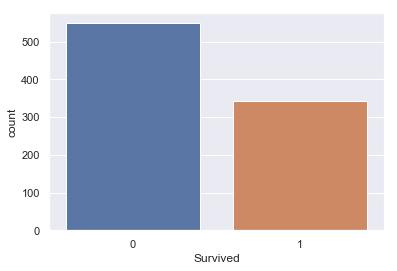

In [29]:
sns.countplot(x='Survived', data=df);

In [30]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

### Gender & Survival

### Task 4
#### Make a bar chart for gender 

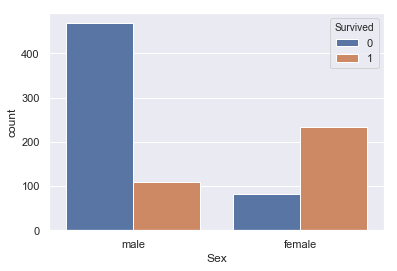

In [31]:
#Write code here using seaborn
sns.countplot(x='Sex',hue='Survived', data=df)

### Passenger Survival Class

### Task 5
#### Make a bar chart for Pclass

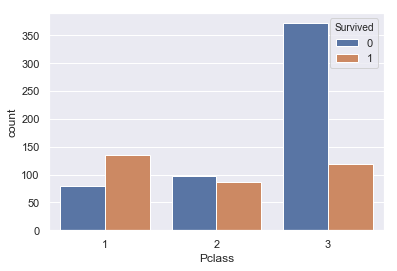

In [32]:
#Write code here using seaborn
sns.countplot(x='Pclass',hue='Survived',data=df)

### Scatter plots

C:\Users\Fatima Bukhari\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


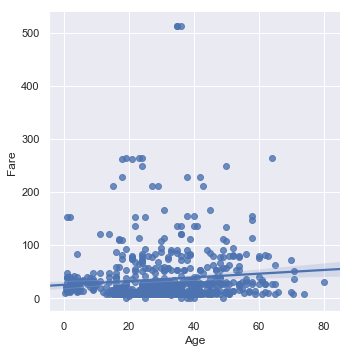

In [33]:
# Using Seaborn
sns.lmplot('Age','Fare',data=df)

## Finding Mean , Median using numpy

In [34]:
mean_fare=np.mean(df['Fare'])

In [35]:
mean_fare

32.2042079685746

In [36]:
median_fare=np.median(df['Fare'])

In [37]:
median_fare

14.4542

### Task 6
#### Find mean median of the following:
- mean and median of Age
- median of fare

In [41]:
# Write code here
median_age=np.median(df['Age'])
median_age

C:\Users\Fatima Bukhari\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


nan

In [42]:
mean_fare=np.mean(df['Fare'])
mean_fare

32.2042079685746